
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - polynomial regression <br>
<font color=696880 size=4>
Ali Rahimi Akbar

____

#Personal Data

In [1]:
# Set your student number and name
student_number = "401106663"
Name = "Arian"
Last_Name = "Noori"

## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.


## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-3 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^6 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [2]:
import numpy as np

def generate_dataset(range_start , range_end , num_samples , noise_std = 5.0):
    X = np.random.uniform(range_start , range_end , num_samples)
    Y = 0.1 * X ** 6 - 2 * X ** 3 + 7 * X ** 2 - 9 * X + 3
    noise = np.random.normal(0 , noise_std , num_samples)
    Y += noise
    return X , Y

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 4 to 6.**

In [3]:
from sklearn.model_selection import train_test_split

X_train, Y_train = generate_dataset(-3 , -1 , 1000)

X_train , X_test_1_3 , Y_train , Y_test_1_3 = train_test_split(X_train , Y_train , test_size = 0.5 , random_state = 42)

X_test_4_6 , Y_test_4_6 = generate_dataset(4 , 6 , len(X_test_1_3))

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 12. You can't use sklearn library for this section

In [1]:
import numpy as np

class PolynomialRegression:
    def __init__(self, degree, learning_rate = 0.005, iterations = 50000):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coefficients = None
        self.mean = None
        self.variance = None

    def fit(self, X, Y):
        #self.mean = np.mean(X)
        #self.variance = np.var(X)
        X = self.normalize(X)
        X_poly = np.vander(X, self.degree + 1, increasing = True)
        self.coefficients = np.random.randn(self.degree + 1)

        for _ in range(self.iterations):
            predictions = X_poly.dot(self.coefficients)
            error = predictions - Y
            gradients = X_poly.T.dot(error) * 2 / len(Y)
            gradients = np.clip(gradients, -1, 1)
            self.coefficients -= self.learning_rate * gradients

    def predict(self, X):
        X = self.normalize(X)
        X_poly = np.vander(X, self.degree + 1, increasing = True)
        return X_poly.dot(self.coefficients)
    
    
    def normalize(self , X):
        return (X - np.mean(X)) / np.std(X)

## 4. Model Evaluation (15 Points)
Evaluate the models on both train and test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.

In [4]:
from sklearn.metrics import mean_squared_error


models = {}
for degree in range(2, 13):
    model = PolynomialRegression(degree = degree)
    model.fit(X_train, Y_train)
    models[degree] = model
    

def evaluate_models(models, X_train, Y_train, X_test_1_3, Y_test_1_3, X_test_4_6, Y_test_4_6):
    LIST = []
    for degree, model in models.items():
        
        Y_train_pred = model.predict(X_train)
        Y_test_1_3_pred = model.predict(X_test_1_3)
        Y_test_4_6_pred = model.predict(X_test_4_6)
        
        train_mse = mean_squared_error(Y_train, Y_train_pred)
        test_1_3_mse = mean_squared_error(Y_test_1_3, Y_test_1_3_pred)
        test_4_6_mse = mean_squared_error(Y_test_4_6, Y_test_4_6_pred)

        LIST.append([train_mse, test_1_3_mse, test_4_6_mse])
    return LIST

LIST = evaluate_models(models, X_train, Y_train, X_test_1_3, Y_test_1_3, X_test_4_6, Y_test_4_6)
for i in range (len(LIST)):
    print("degree:" , (i + 2) , LIST[i])


degree: 2 [34.64500166706646, 34.896139551699484, 4657520.9220850095]
degree: 3 [25.783285614535888, 25.80136988532222, 4655612.387882519]
degree: 4 [25.731417758530814, 25.64800557941483, 4655816.769703397]
degree: 5 [25.56041508426903, 25.355100593883602, 4655434.984758444]
degree: 6 [25.515680844700107, 25.392101478600832, 4655287.427626706]
degree: 7 [25.58440610408919, 25.50416721900142, 4655063.583154924]
degree: 8 [25.250102392733343, 25.73157892092038, 4655267.236224305]
degree: 9 [26.55189167259625, 26.96805606264298, 4654798.195819035]
degree: 10 [31.558863776671966, 35.13982657970947, 4655152.4739129655]
degree: 11 [30.836286104844504, 32.066237216453175, 4656760.101115704]
degree: 12 [42.989380007671755, 40.22088085057614, 4655817.019047114]


## 5. Plotting your predicted polynomial function

plot your predicted function at degree 5 and 6 and 7 and the base function from question in range -3 to -1.

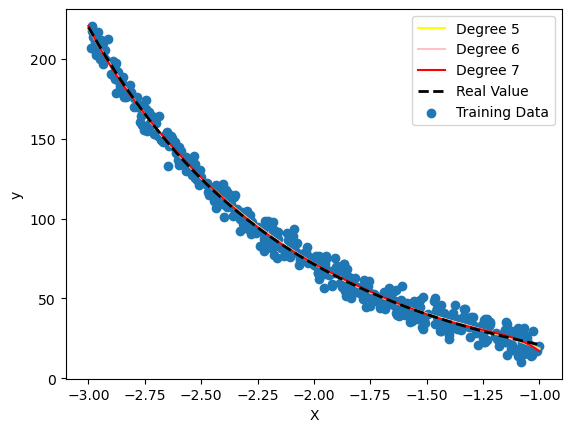

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def plot_predictions(models, degrees, X_train, Y_train, X):
    Y_plot = 0.1 * X ** 6 - 2 * X ** 3 + 7 * X ** 2 - 9 * X + 3

    colors = ['yellow', 'pink', 'red']
    degree_names = ['Degree 5', 'Degree 6', 'Degree 7']
    for i, degree in enumerate(degrees):
        model = models[degree]
        Y_pred = model.predict(X)
        plt.plot(X, Y_pred, label = degree_names[i], color = colors[i])

    plt.plot(X, Y_plot, label="Real Value", color='black', linewidth=2, linestyle='--')

    plt.scatter(X_train, Y_train, label="Training Data")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

X_plot = np.linspace(-3, -1, 400)
degrees_to_plot = [5, 6, 7]
plot_predictions(models, degrees_to_plot, X_train, Y_train, X_plot)

## 6. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and test sets based on the model degree varying from 2 to 12.

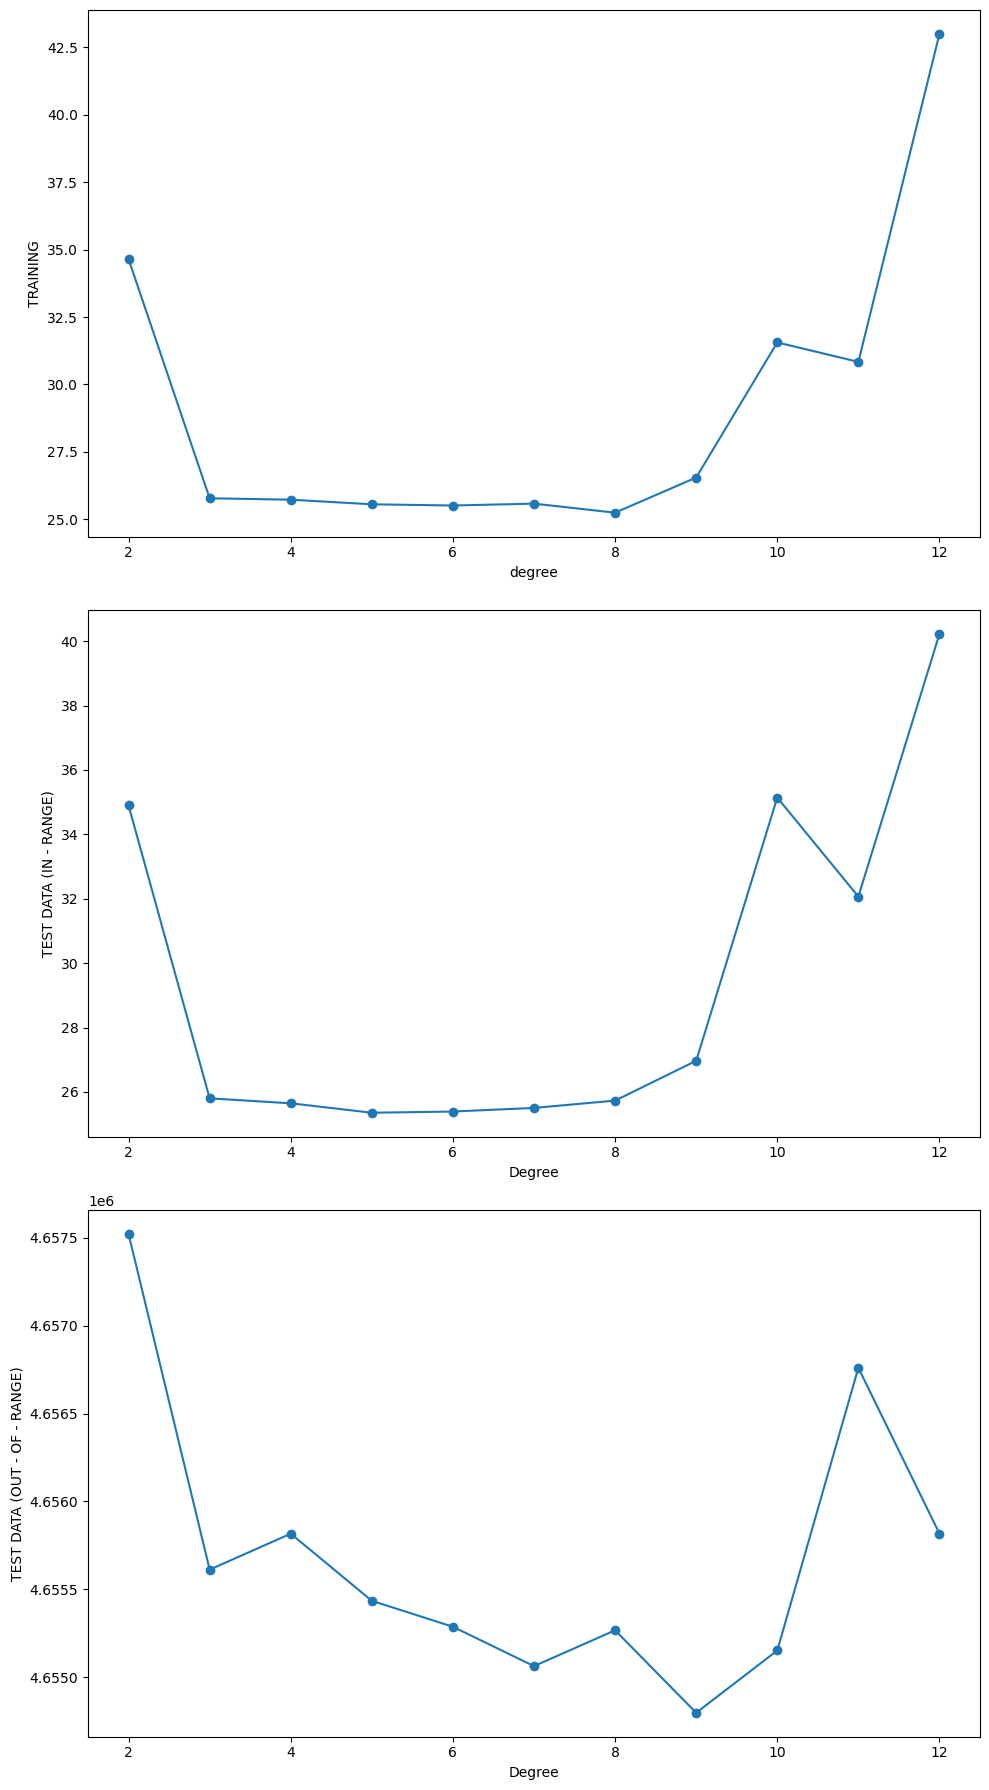

In [6]:
import matplotlib.pyplot as plt
import numpy as np

train_mses = []
test_1_3_mses = []
test_4_6_mses = []


for degree in range(2, 13):
    train_mse, test_1_3_mse, test_4_6_mse = LIST[degree - 2]
    train_mses.append(train_mse)
    test_1_3_mses.append(test_1_3_mse)
    test_4_6_mses.append(test_4_6_mse)

fig, axes = plt.subplots(3, 1, figsize=(10, 18))

axes[0].plot(range(2, 13), train_mses, marker='o')
axes[0].set_xlabel('degree')
axes[0].set_ylabel('TRAINING')

axes[1].plot(range(2, 13), test_1_3_mses, marker='o')
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('TEST DATA (IN - RANGE)')

axes[2].plot(range(2, 13), test_4_6_mses, marker='o')
axes[2].set_xlabel('Degree')
axes[2].set_ylabel('TEST DATA (OUT - OF - RANGE)')

plt.tight_layout()
plt.show()


## Conclusion (10 Points)
With comparing the loss of **training set and the test set** specially in higher degrees, what we can conclude about the bias - variance trade off?


The bias - variance tradeoff concerns finding a balance between a model's ability to capture underlying patterns (bias / underfitting) and its sensitivity to data fluctuations (variance / overfitting). In polynomial regression, underfitting is indicated by high losses on both training and test sets, while high overfitting shows as significantly lower training loss than test loss, especially in higher degrees. To deal with them you should choose an appropriate model complexity, such as polynomial degree, through techniques like cross-validation, ensuring the model generalizes well while capturing underlying patterns.